In [11]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import sklearn.linear_model as lm
rcParams['font.family'] = 'Noto Sans CJK SC'
rcParams['font.size'] = 14
rcParams['font.weight'] = 'medium'

In [2]:
class DataSet:
    def __init__(self, x, y, shuffle=True):

        self.n_samples = x.shape[0]
        if shuffle:
            _idx = np.random.permutation(self.n_samples)
            self.x = x[_idx, :]
            self.y = y[_idx, :]
        else:
            self.x = x
            self.y = y
    
        self.dim_x = np.prod(x.shape[1:])
        self.dim_y = np.prod(y.shape[1:])
    
    def get_y_categories(self):
        return np.unique(self.y)
    
    def get_x_by_y(self, y):
        idx = np.ravel(self.y == y)
        return self.x[idx, :]
    
    def __add__(self, D2, shuffle=True):
        if not (self.dim_x == D2.dim_x 
            and self.dim_y == D2.dim_y):
            raise ValueError("Dimension mismatch")
        else:
            x_new = np.vstack((self.x, D2.x))
            y_new = np.vstack((self.y, D2.y))
            return DataSet(x_new, y_new, shuffle=shuffle)
        
        
    def __radd__(self, D2, shuffle=True):
        if D2 == 0:
            return self
        else:
            return self.__add__(D2, shuffle=shuffle)


In [3]:
def get_class_gen(c):
    def _gen(size, biased=False):
        _shape = (size, c['dim'])
        if biased:
            return rnd.normal(c['mean_biased'],
                              c['var_biased'],
                              _shape)
        else:
            return rnd.normal(c['mean'], c['var'], _shape)
    return _gen


def get_class_data(c, size, biased=False):
    _gen = get_class_gen(c)
    if biased:
        _x = _gen(size, biased=True)
    else:
        _x = _gen(size)
    _1s = np.ones(size)
    _y = (_1s*c['label'])[:, np.newaxis]
    return DataSet(_x, _y)


def plot2D(_ax, _data, **kwargs):
    _ax.scatter(_data[:, 0], _data[:, 1],cmap='Set1',
                norm=matplotlib.colors.Normalize(vmin=0, vmax=8),
                **kwargs)

In [4]:
sample_size_tr = 200
sample_size_tst = 200
n_classes = 2
means_choices = [1, -1]
means = [[1, 1], [-1, -1]]
mean_mean = np.sum(means)

In [5]:
def get_class(label):
    bias = 1
    _mean = means[label]
    c = {
        'mean': _mean,
        'var': 0.6,
        'dim': 2,
        'label': label 
    }
    direction = np.sign(np.subtract(_mean, mean_mean))
    direction[0] = 0
    c['mean_biased'] = _mean - direction * bias
    c['var_biased'] = 0.3
    return c.copy()

classes = [get_class(i) for i in range(n_classes)]
print(classes)
data_set = sum(get_class_data(c, size=sample_size_tst) for c in classes)
data_set_biased = sum(get_class_data(c, size=sample_size_tr, biased=True) for c in classes)

[{'mean': [1, 1], 'var': 0.6, 'dim': 2, 'label': 0, 'mean_biased': array([1, 0]), 'var_biased': 0.3}, {'mean': [-1, -1], 'var': 0.6, 'dim': 2, 'label': 1, 'mean_biased': array([-1,  0]), 'var_biased': 0.3}]


In [6]:
data_set_tr = data_set_biased
data_set_tst = data_set

## Test the data that generated

In [90]:
model_lr = lm.LogisticRegression()
model_lr.fit(data_set_tr.x, data_set_tr.y.ravel())
model_lr_true = lm.LogisticRegression()
model_lr_true.fit(data_set_tst.x, data_set_tst.y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

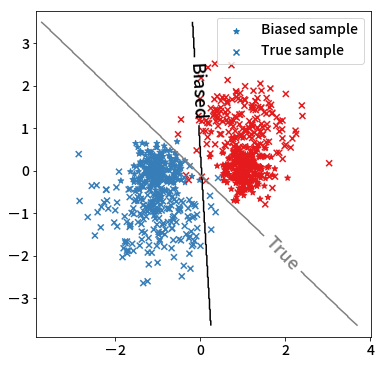

In [91]:
def plot_boundary(_ax, X, model, resolution=512,
                  label='Decision Boundary', **kwargs):
    # create a mesh to plot in
    def get_mesh(_X):
        _min, _max = _X.min() - 1, _X.max() + 1
        h = (_max - _min)/resolution  # step size in the mesh
        return _min, _max, h
    xx, yy = np.meshgrid(np.arange(*get_mesh(X[:, 0])),
                         np.arange(*get_mesh(X[:, 1])))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    CS = _ax.contour(xx, yy, Z, levels=[-0.1, 0.5, 1.1], **kwargs)
    _ax.clabel(CS, fmt={-0.1:'-Inf', 0.5:label, 1.1:'Inf'}, fontsize=18)
    
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.axis('equal')
plot2D(ax, data_set_biased.x, c=data_set_biased.y, marker='*', label='Biased sample')
plot2D(ax, data_set.x, c=data_set.y, marker='x', label='True sample')
plot_boundary(ax, data_set_tst.x, model_lr, colors='black', label='Biased')
plot_boundary(ax, data_set_tst.x, model_lr_true, colors='grey', label='True')
ax.legend()
plt.show()

In [92]:
T_x = np.random.normal((dim_x, dim_s))
T_t = np.random.normal((dim_x, dim_t))

NameError: name 'dim_x' is not defined

In [ ]:
def transfer_samples(_sample):
    